<h1>Import Module</h1>

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h1> Load Dataset<h1\>

In [60]:
imagePaths = 'Dataset\\'
label_list = ['jeruknipis', 'Seledri']
data = []
labels = []

In [61]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [62]:
np.array(data).shape

(100, 32, 32, 3)

<h1>Data Preprocessing</h1>

In [63]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [64]:
print(labels)

['jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Sele

In [65]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<h1> Split Dataset <h1\>

In [66]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [67]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h1>Build CNN Architecture</h1>

In [68]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 50)          0         
                                                                 
 flatten_3 (Flatten)         (None, 3200)             

In [70]:
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [71]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h1> Train Model <h1\>

In [72]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 106ms/step - loss: 1.0819 - accuracy: 0.4000 - val_loss: 0.6794 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 48ms/step - loss: 0.8728 - accuracy: 0.4750 - val_loss: 0.6747 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 0.7321 - accuracy: 0.4750 - val_loss: 0.7344 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6856 - accuracy: 0.5625 - val_loss: 0.7799 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 37ms/step - loss: 0.7192 - accuracy: 0.5000 - val_loss: 0.7199 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6723 - accuracy: 0.5875 - val_loss: 0.6808 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 48ms/step - loss: 0.6667 - accuracy: 0.5875 - val_loss: 0.6652 - val_accuracy: 0.6000
Epoch 8/100
3/3 [==

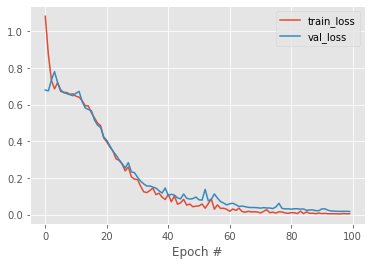

In [73]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h1>Evaluate Model</h1>

In [74]:
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int64)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

  jeruknipis       1.00      1.00      1.00         8
     Seledri       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [75]:
queryPath = imagePaths+'tes.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.00014555]]


In [76]:
if q_pred<=0.5 :
    target = "jeruknipis"
else :
    target = "Seledri"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output')